In [1]:
from matplotlib import pyplot as plt
import pandas as pd

import sys, os
sys.path.insert(0, os.path.abspath('../scripts/'))
import footyviz

In [4]:
!pip install shapely

     |████████████████████████████████| 1.6MB 497kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


# Loading Data



In [2]:
data = pd.read_csv('liverpool_2019.csv', index_col=('play', 'frame'))
data.head()


Unnamed: 0 bgcolor        dx        dy  \
play                          frame                                           
Liverpool [3] - 0 Bournemouth 0               0     NaN  0.000000  0.000000   
                              1               1     NaN  0.185745  1.217580   
                              2               2     NaN  0.178659  1.171133   
                              3               3     NaN  0.171573  1.124685   
                              4               4     NaN  0.164488  1.078238   

                                    edgecolor  player  player_num team  \
play                          frame                                      
Liverpool [3] - 0 Bournemouth 0           NaN       0         NaN  NaN   
                              1           NaN       0         NaN  NaN   
                              2           NaN       0         NaN  NaN   
                              3           NaN       0         NaN  NaN   
                              4           NaN       0         NaN  NaN   

                                             x          y    z  
play                          frame                             
Liverpool [3] - 0 Bournemouth 0      46.394558  11.134454  0.0  
                              1      46.580302  12.352034  0.0  
                              2      46.758961  13.523166  0.0  
                              3      46.930535  14.647852  0.0  
                              4      47.095022  15.726090  0.0

In [3]:
#list of goals included in the dataset
data.index.get_level_values('play').unique()

Index(['Liverpool [3] - 0 Bournemouth', 'Bayern 0 - [1] Liverpool',
       'Fulham 0 - [1] Liverpool', 'Southampton 1 - [2] Liverpool',
       'Liverpool [2] - 0 Porto', 'Porto 0 - [2] Liverpool',
       'Liverpool [4] - 0 Barcelona', 'Liverpool [1] - 0 Wolves',
       'Liverpool [3] - 0 Norwich', 'Liverpool [2] - 1 Chelsea',
       'Liverpool [2] - 1 Newcastle', 'Liverpool [2] - 0 Salzburg',
       'Genk 0 - [3] Liverpool', 'Liverpool [2] - 0 Man City',
       'Liverpool [1] - 0 Everton', 'Liverpool [2] - 0 Everton',
       'Bournemouth 0 - 3 Liverpool', 'Liverpool [1] - 0 Watford',
       'Leicester 0 - [3] Liverpool'],
      dtype='object', name='play')

In [4]:
play = 'Liverpool [2] - 0 Man City'
df = data.loc[play]
df

,Unnamed: 0,bgcolor,dx,dy,edgecolor,player,player_num,team,x,y,z
frame,,,,,,,,,,,
0,0,NaN,0.000000,0.000000,NaN,0,NaN,NaN,61.736642,85.712467,0.0000
1,1,NaN,-0.546012,-1.584160,NaN,0,NaN,NaN,61.190630,84.128307,0.0585
2,2,NaN,-0.540064,-1.566901,NaN,0,NaN,NaN,60.650567,82.561406,0.1140
3,3,NaN,-0.534115,-1.549641,NaN,0,NaN,NaN,60.116452,81.011765,0.1665
4,4,NaN,-0.528166,-1.532382,NaN,0,NaN,NaN,59.588286,79.479383,0.2160
5,5,NaN,-0.522217,-1.515123,NaN,0,NaN,NaN,59.066069,77.964260,0.2625
6,6,NaN,-0.516268,-1.497863,NaN,0,NaN,NaN,58.549800,76.466397,0.3060
7,7,NaN,-0.510320,-1.480604,NaN,0,NaN,NaN,58.039481,74.985793,0.3465
8,8,NaN,-0.504371,-1.463345,NaN,0,NaN,NaN,57.535110,73.522449,0.3840


# Basic Plotting

You may have noticed I picked an interesting goal. It was my favorite football moment from 2019: a simple corner taken quickly.

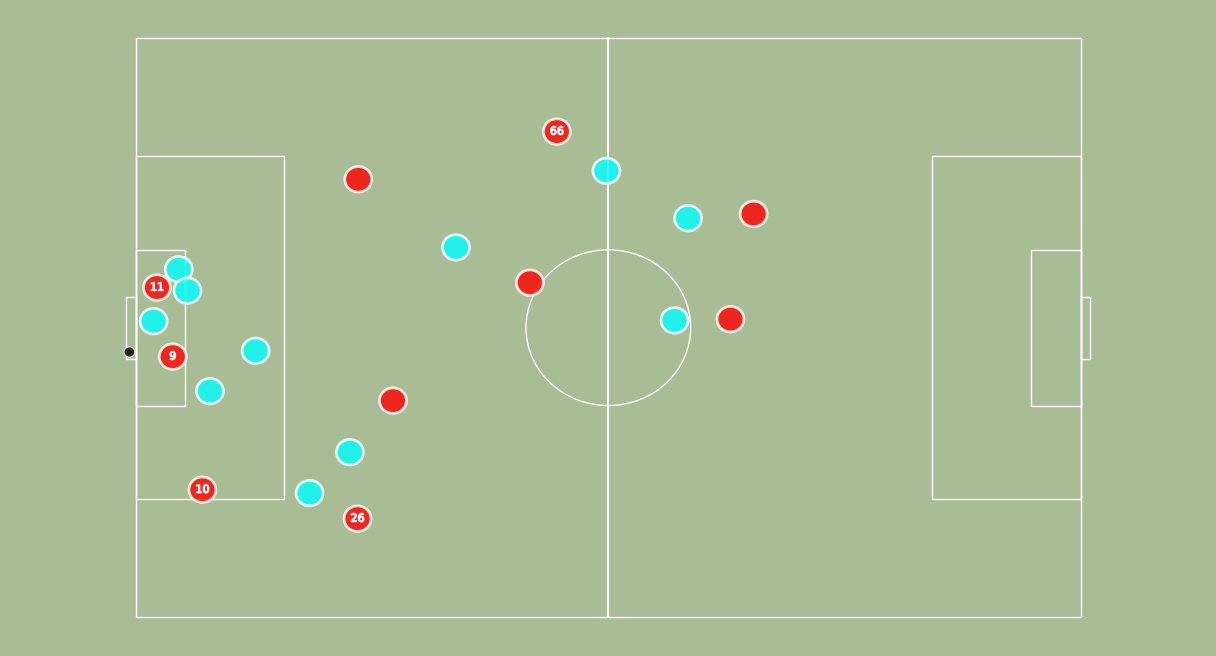

In [5]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=8)

This was probably what was on Trent Alexander-Arnold's head:

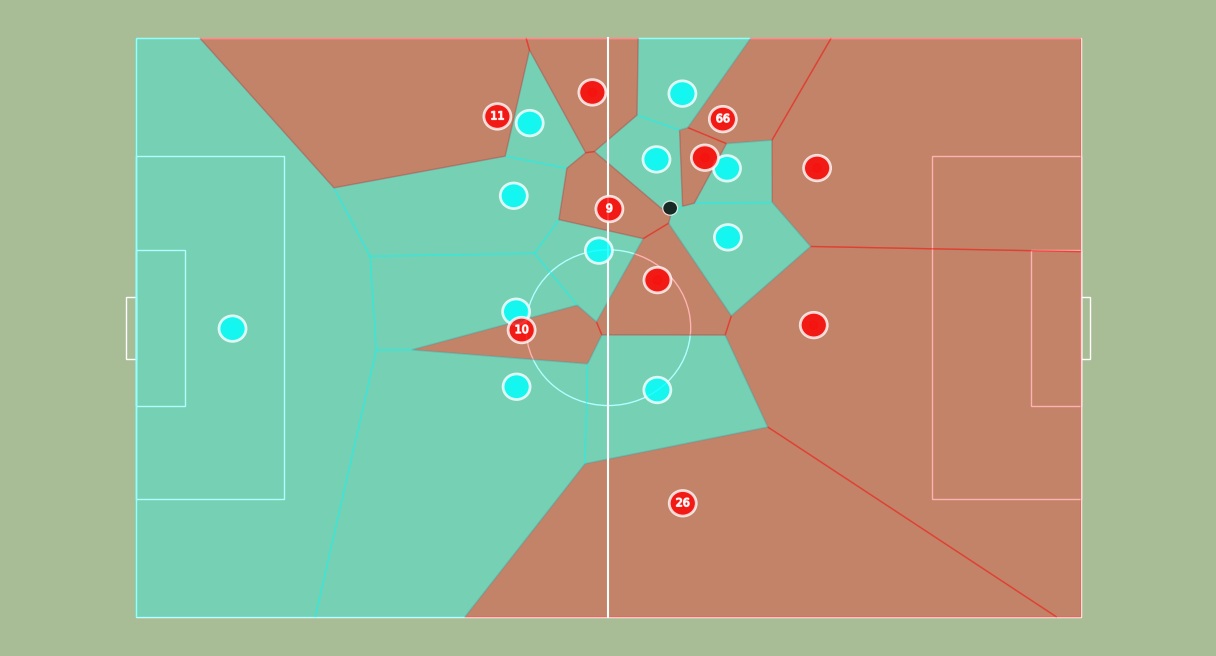

In [6]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=0.5)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)

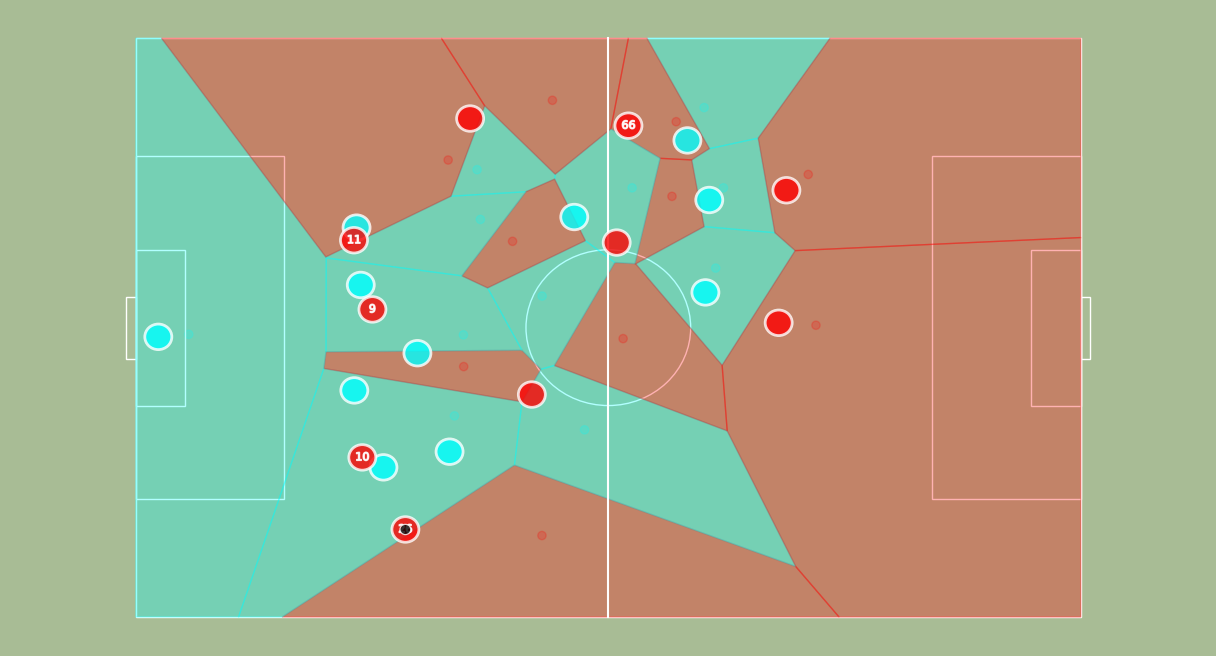

In [10]:
#you can mix different frames for the player's positioning and for the voronoi (e.g. fixing the voronoi to the time of the pass)
fig, ax, dfFrame = footyviz.draw_frame(df, t=5)
dfFrame_for_voronoi = footyviz.get_frame(df, t=3)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame_for_voronoi)

# MoviePy

MoviePy is a Python module for video editing that works nicely with matplotlib and Jupyter and is built on top of FFmpeg. You may think you never used FFMpeg, but you have. From Wikipedia:

> FFmpeg is used by software such as VLC media player, xine, Cinelerra-GG video editor, Plex, Kodi, Blender, HandBrake, YouTube, and MPC-HC; it handles video and audio playback in Google Chrome, and Linux version of Firefox. 

You can find MoviePy's documentation at: https://zulko.github.io/moviepy/

Let's start with a basic animation:

In [43]:
from moviepy import editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

def draw_frame_x(df, t, fps, voronoi=False):
    fig,ax,dfFrame = footyviz.draw_frame(df, t=t, fps=fps)
    if voronoi:
        fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
    image = mplfig_to_npimage(fig)
    plt.close()
    return image    

def make_animation(df, fps=20, voronoi=False):
    #calculated variables
    length=(df.index.max()+20)/fps
    clip = mpy.VideoClip(lambda x: draw_frame_x(df, t=x, fps=fps, voronoi=voronoi), duration=length-1).set_fps(fps)
    return clip

clip = make_animation(df)

clip.ipython_display()
clip.write_videofile("Goal.mp4")

t:   0%|          | 0/166 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



t:   0%|          | 0/166 [00:00<?, ?it/s, now=None]          

Moviepy - Done !
Moviepy - video ready __temp__.mp4
Moviepy - Building video Goal.mp4.
Moviepy - Writing video Goal.mp4



Moviepy - Done !
Moviepy - video ready Goal.mp4


This isn't much different from what you can do with Matplotlib's native animate capabilities.

The advantage of having MoviePy in the mix is having easy accsess to editing, compositing and transformation functions. Let's try some examples:

In [44]:
clip.rotate(90).ipython_display()

t:   0%|          | 0/166 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [45]:
#moviepy allows for method chaining several effects in one line of code:
clip.rotate(90).crop(y1=100, y2=500).ipython_display()

t:   0%|          | 0/166 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


Linear editing is easy with the ``subclip`` method (for trimming) and ``concatenate_videoclips`` function (to join clips):

normal speed: 176.5 seconds
2x speed: 88.25 seconds


t:   0%|          | 0/3530 [00:00<?, ?it/s, now=None]

Moviepy - Building video AllGoals.mp4.
Moviepy - Writing video AllGoals.mp4



t:   2%|▏         | 72/3530 [00:16<13:23,  4.30it/s, now=None]

KeyboardInterrupt: 

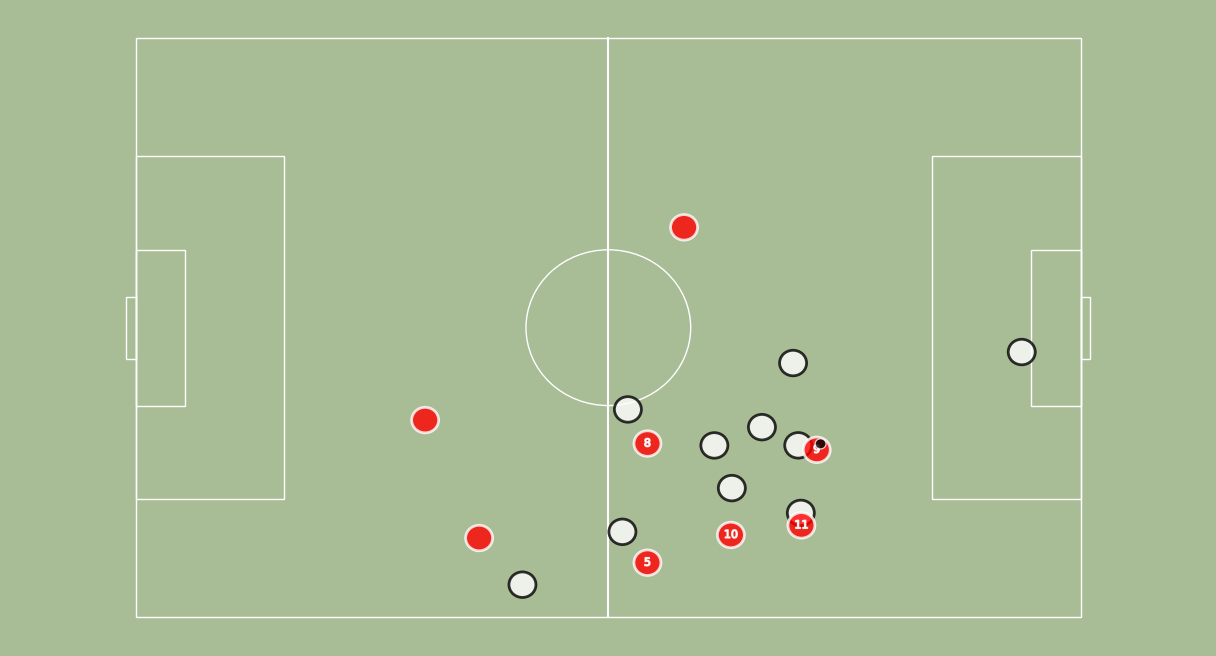

In [46]:
full_clip = mpy.concatenate_videoclips([make_animation(data.loc[play]) for play in data.index.get_level_values('play').unique()])

print('normal speed:', full_clip.duration, 'seconds')
print('2x speed:', full_clip.speedx(2).duration, 'seconds')

full_clip.ipython_display(t=50)
full_clip.write_videofile("AllGoals.mp4")

Non-linear editing uses the ``CompositeClip`` object:


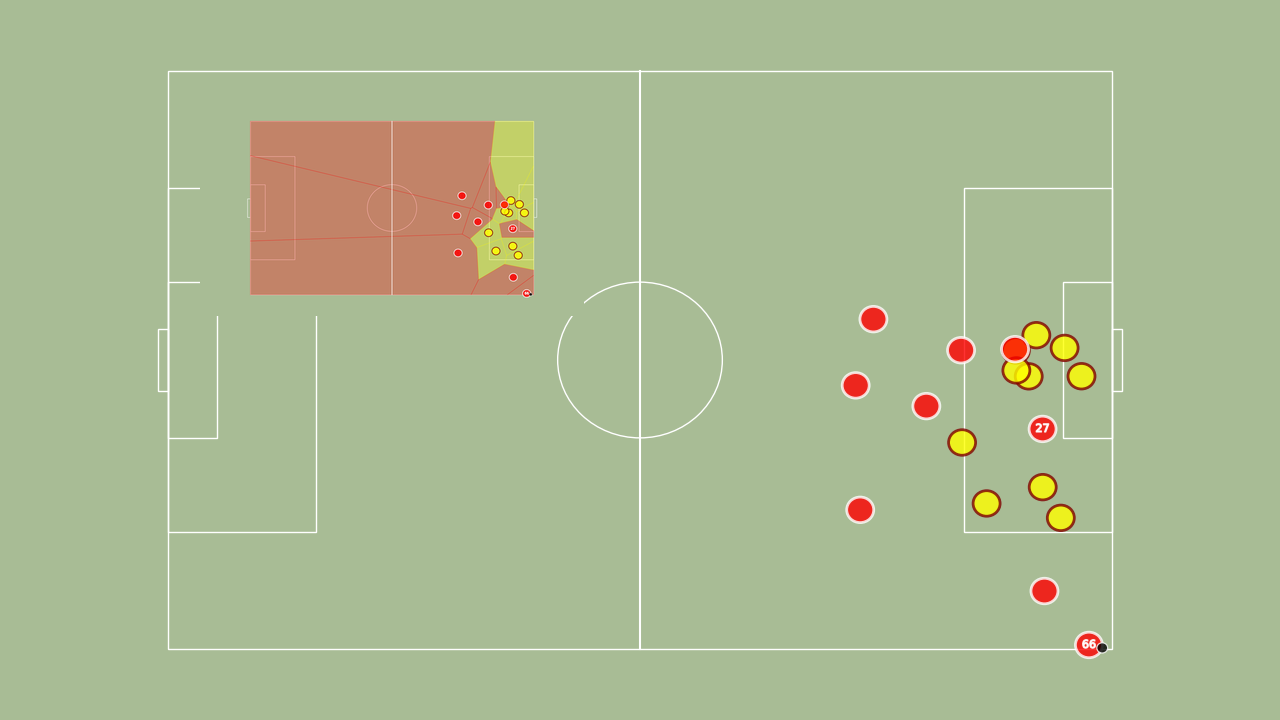

In [30]:
clip_voronoi = make_animation(df, voronoi=True)
composite_clip = mpy.CompositeVideoClip([clip, clip_voronoi.resize(0.3).set_position((200,100))])
composite_clip.ipython_display(t=4)